## Step 1: Import libraries

In [1]:
import matplotlib.pyplot as plt
import json

## Step 2: Plotting Electricity

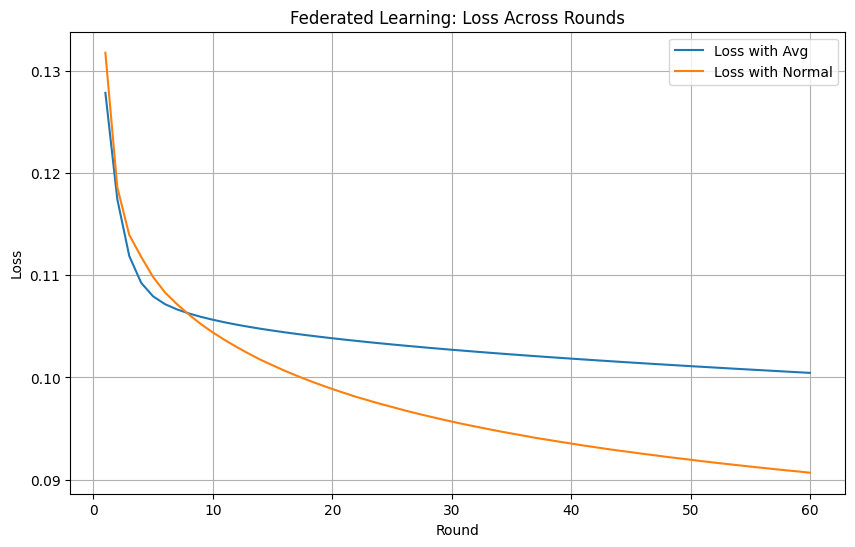

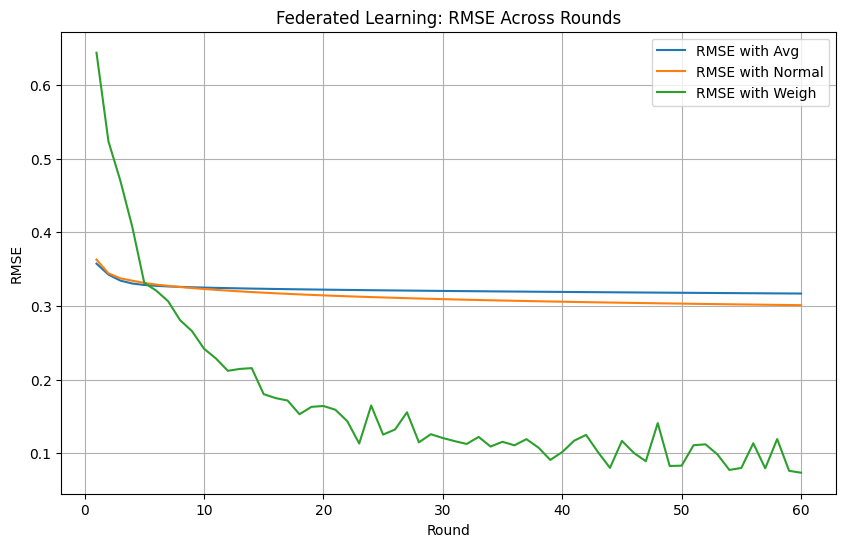

In [9]:
HISTORY_DIR = f'model_history'
DATASET = "electricity"
PERCENTAGE_MISSING_CLIENT = "01"
MISSING_MODE = "noadjacency"
MATRIX_MISSING_LENGTH = "10x10"
LOCATION = "central"

avg_losses_rmses_dict = {}
normal_losses_rmses_dict = {}
weigh_losses_rmses_dict = {}

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/{PERCENTAGE_MISSING_CLIENT}/{MISSING_MODE}/losses_rmses.json") as avg_file:
    avg_losses_rmses_dict = json.load(avg_file)

with open(f"{HISTORY_DIR}/{DATASET}/normal/{LOCATION}/losses_rmses.json") as normal_file:
    normal_losses_rmses_dict = json.load(normal_file)

with open("model_history/weigh/losses_rmses.json") as weigh_file:
    weigh_losses_rmses_dict = json.load(weigh_file)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(avg_losses_rmses_dict['losses']) + 1), avg_losses_rmses_dict['losses'], label='Loss with Avg')
plt.plot(range(1, len(normal_losses_rmses_dict['losses']) + 1), normal_losses_rmses_dict['losses'], label='Loss with Normal')
# plt.plot(range(1, len(weigh_losses_rmses_dict['losses']) + 1), weigh_losses_rmses_dict['losses'], label='Loss with Weigh')
plt.title("Federated Learning: Loss Across Rounds")
plt.xlabel("Round")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(avg_losses_rmses_dict['rmses']) + 1), avg_losses_rmses_dict['rmses'], label='RMSE with Avg')
plt.plot(range(1, len(normal_losses_rmses_dict['rmses']) + 1), normal_losses_rmses_dict['rmses'], label='RMSE with Normal')
plt.plot(range(1, len(weigh_losses_rmses_dict['rmses']) + 1), weigh_losses_rmses_dict['rmses'], label='RMSE with Weigh')
plt.title("Federated Learning: RMSE Across Rounds")
plt.xlabel("Round")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

## Step 3: Plotting Weather

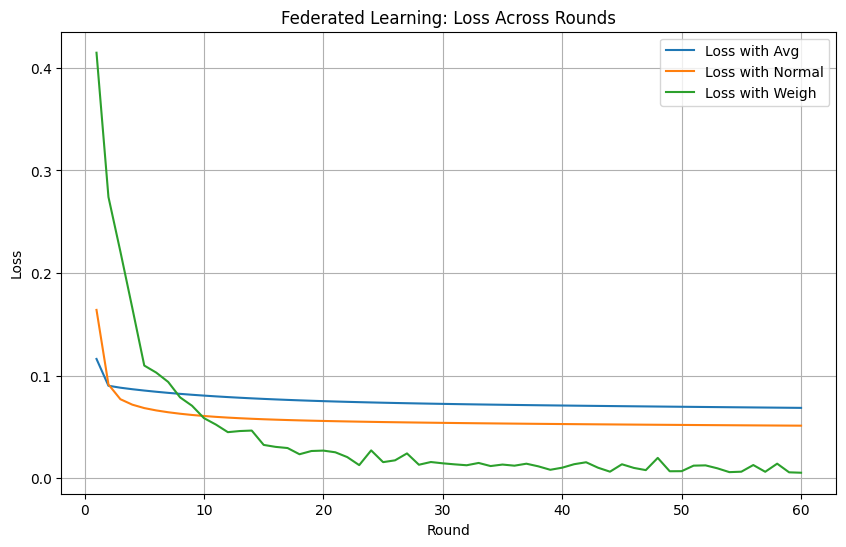

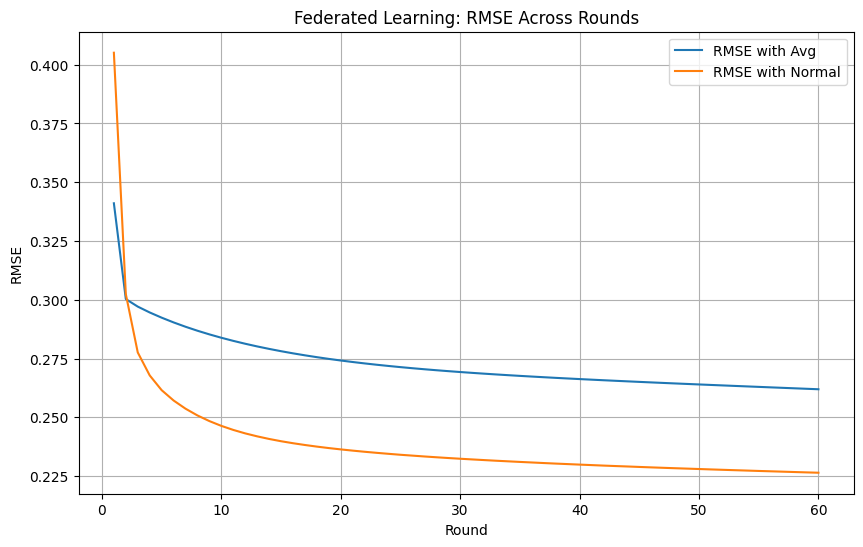

In [10]:
HISTORY_DIR = f'model_history'
DATASET = "weather"
PERCENTAGE_MISSING_CLIENT = "01"
MISSING_MODE = "noadjacency"
MATRIX_MISSING_LENGTH = "10x10"
LOCATION = "central"

avg_losses_rmses_dict = {}
normal_losses_rmses_dict = {}
weigh_losses_rmses_dict = {}

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/{PERCENTAGE_MISSING_CLIENT}/{MISSING_MODE}/losses_rmses.json") as avg_file:
    avg_losses_rmses_dict = json.load(avg_file)

with open(f"{HISTORY_DIR}/{DATASET}/normal/{LOCATION}/losses_rmses.json") as normal_file:
    normal_losses_rmses_dict = json.load(normal_file)

with open("model_history/weigh/losses_rmses.json") as weigh_file:
    weigh_losses_rmses_dict = json.load(weigh_file)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(avg_losses_rmses_dict['losses']) + 1), avg_losses_rmses_dict['losses'], label='Loss with Avg')
plt.plot(range(1, len(normal_losses_rmses_dict['losses']) + 1), normal_losses_rmses_dict['losses'], label='Loss with Normal')
plt.plot(range(1, len(weigh_losses_rmses_dict['losses']) + 1), weigh_losses_rmses_dict['losses'], label='Loss with Weigh')
plt.title("Federated Learning: Loss Across Rounds")
plt.xlabel("Round")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(avg_losses_rmses_dict['rmses']) + 1), avg_losses_rmses_dict['rmses'], label='RMSE with Avg')
plt.plot(range(1, len(normal_losses_rmses_dict['rmses']) + 1), normal_losses_rmses_dict['rmses'], label='RMSE with Normal')
# plt.plot(range(1, len(weigh_losses_rmses_dict['rmses']) + 1), weigh_losses_rmses_dict['rmses'], label='RMSE with Weigh')
plt.title("Federated Learning: RMSE Across Rounds")
plt.xlabel("Round")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

## Step 4: Traffic dataset

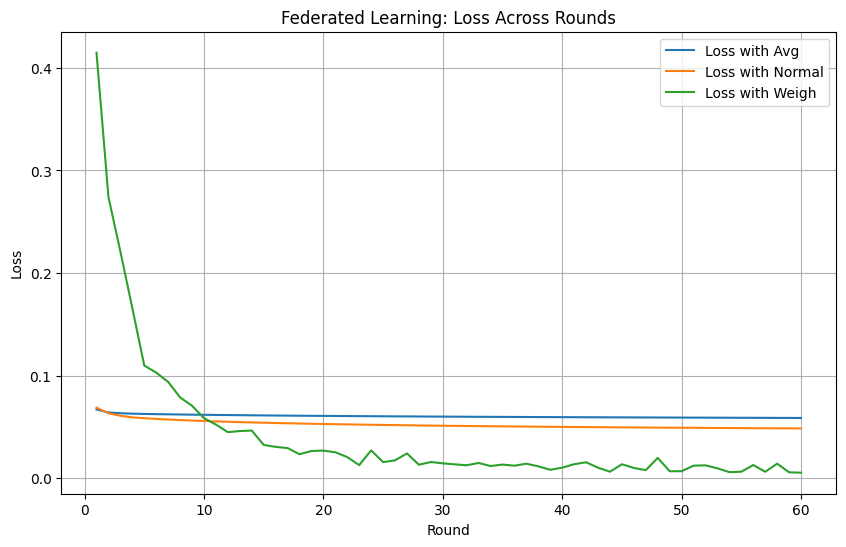

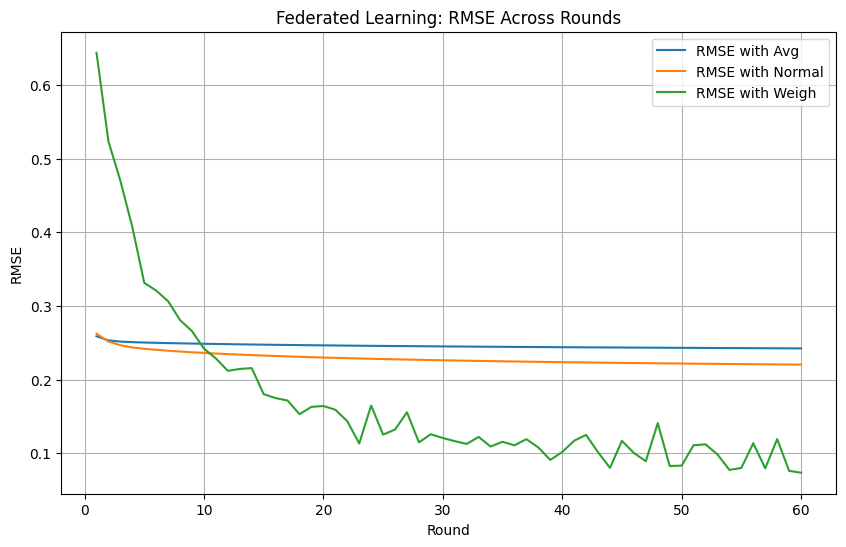

In [12]:
HISTORY_DIR = f'model_history'
DATASET = "traffic"
PERCENTAGE_MISSING_CLIENT = "01"
MISSING_MODE = "noadjacency"
MATRIX_MISSING_LENGTH = "10x10"
LOCATION = "central"

avg_losses_rmses_dict = {}
normal_losses_rmses_dict = {}
weigh_losses_rmses_dict = {}

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/{PERCENTAGE_MISSING_CLIENT}/{MISSING_MODE}/losses_rmses.json") as avg_file:
    avg_losses_rmses_dict = json.load(avg_file)

with open(f"{HISTORY_DIR}/{DATASET}/normal/{LOCATION}/losses_rmses.json") as normal_file:
    normal_losses_rmses_dict = json.load(normal_file)

with open("model_history/weigh/losses_rmses.json") as weigh_file:
    weigh_losses_rmses_dict = json.load(weigh_file)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(avg_losses_rmses_dict['losses']) + 1), avg_losses_rmses_dict['losses'], label='Loss with Avg')
plt.plot(range(1, len(normal_losses_rmses_dict['losses']) + 1), normal_losses_rmses_dict['losses'], label='Loss with Normal')
plt.plot(range(1, len(weigh_losses_rmses_dict['losses']) + 1), weigh_losses_rmses_dict['losses'], label='Loss with Weigh')
plt.title("Federated Learning: Loss Across Rounds")
plt.xlabel("Round")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(avg_losses_rmses_dict['rmses']) + 1), avg_losses_rmses_dict['rmses'], label='RMSE with Avg')
plt.plot(range(1, len(normal_losses_rmses_dict['rmses']) + 1), normal_losses_rmses_dict['rmses'], label='RMSE with Normal')
plt.plot(range(1, len(weigh_losses_rmses_dict['rmses']) + 1), weigh_losses_rmses_dict['rmses'], label='RMSE with Weigh')
plt.title("Federated Learning: RMSE Across Rounds")
plt.xlabel("Round")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

## Step 6: PSM dataset

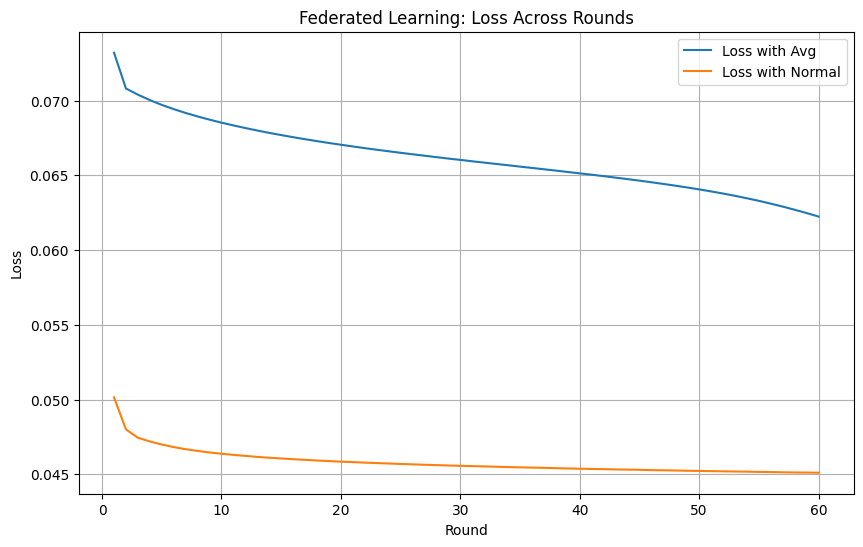

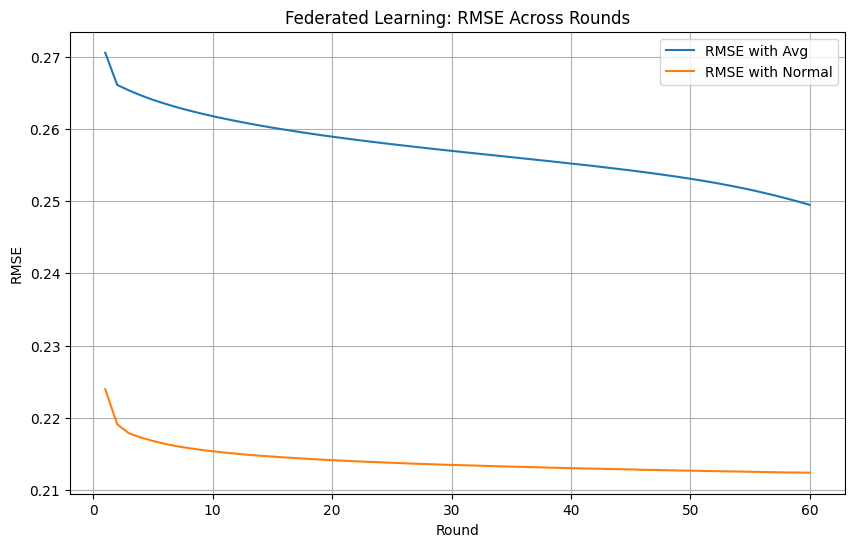

In [4]:
HISTORY_DIR = f'model_history'
DATASET = "psm"
PERCENTAGE_MISSING_CLIENT = "01"
MISSING_MODE = "noadjacency"
MATRIX_MISSING_LENGTH = "10x10"
LOCATION = "central"

avg_losses_rmses_dict = {}
normal_losses_rmses_dict = {}
weigh_losses_rmses_dict = {}

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/{PERCENTAGE_MISSING_CLIENT}/{MISSING_MODE}/losses_rmses.json") as avg_file:
    avg_losses_rmses_dict = json.load(avg_file)

with open(f"{HISTORY_DIR}/{DATASET}/normal/{LOCATION}/losses_rmses.json") as normal_file:
    normal_losses_rmses_dict = json.load(normal_file)

# with open("model_history/weigh/losses_rmses.json") as weigh_file:
#     weigh_losses_rmses_dict = json.load(weigh_file)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(avg_losses_rmses_dict['losses']) + 1), avg_losses_rmses_dict['losses'], label='Loss with Avg')
plt.plot(range(1, len(normal_losses_rmses_dict['losses']) + 1), normal_losses_rmses_dict['losses'], label='Loss with Normal')
# plt.plot(range(1, len(weigh_losses_rmses_dict['losses']) + 1), weigh_losses_rmses_dict['losses'], label='Loss with Weigh')
plt.title("Federated Learning: Loss Across Rounds")
plt.xlabel("Round")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(avg_losses_rmses_dict['rmses']) + 1), avg_losses_rmses_dict['rmses'], label='RMSE with Avg')
plt.plot(range(1, len(normal_losses_rmses_dict['rmses']) + 1), normal_losses_rmses_dict['rmses'], label='RMSE with Normal')
# plt.plot(range(1, len(weigh_losses_rmses_dict['rmses']) + 1), weigh_losses_rmses_dict['rmses'], label='RMSE with Weigh')
plt.title("Federated Learning: RMSE Across Rounds")
plt.xlabel("Round")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()